# [**시계열 알고리즘 종류**](https://paperswithcode.com/area/time-series)

**"통계추론, 기계학습 및 딥러닝의 흐름에 `시간패턴`을 반영하려 진화"**

**"`지도학습(예측 분류), 비지도학습` 문제에 모두 활용되는 필수 알고리즘"** 

**"`미래 예측을 포함한 추천 서비스와 같은 비즈니스`에 활용중"** 

<img src='./img/TS_Evolution.png' width='900'>

#### 1) 통계추론(Statistical Inference) 알고리즘

- `통계분포`에 기반한 `설명력 중시 알고리즘`

<img src='./img/TS_Algorithm_Concept.png' width='700'>

**(1) 단변량 선형기반:** `Y가 1개` & `Y와 X의 관계를 선형 가정`

- Linear Regression

- `ARIMA(AutoRegressive Integrated Moving Average)`

- `ARIMAX`

- `SARIMAX`

**(2) 다변량 선형기반:** `Y가 2개 이상` & `Y와 X의 관계를 선형 가정`

- Bayesian-based Models

- [`Vector Autoregression(VAR)`](https://en.wikipedia.org/wiki/Vector_autoregression)

- `Vector Error Correction Model(VECM)`

**(3) 비선형기반:** `Y와 X의 관계를 비선형 가정`

- `Exponential Smoothing`

- `ETS(Error/Trend/Seasonal)`

- `Kalman Filter`

- State Space Model

- Change Point Detection(CPD)

- `Autoregressive conditional heteroskedasticity(ARCH)`

- [`Generalized Autoregressive Conditional Heteroskedasticity(GARCH)`](https://en.wikipedia.org/wiki/Autoregressive_conditional_heteroskedasticity)

#### 2) 기계학습/딥러닝 알고리즘

- `컴퓨팅` 기반 `인공지능 알고리즘`으로 `정확성 높은 비선형 관계` 추론

- `Prophet`

- `Neural Prophet`

- `RNN(Recurrent Neural Network)`

- `LSTM(Long Short-Term Memory)`

- `GRU(Gated Recurrent Unit)`

- Neural Networks Autoregression(NNAR)

- Attention

- Self-attention

- Transformer

#### 3) Platforms

- 글로벌 기업들이 독자적으로 개발한 `시계열 분석 플랫폼` 확대중

- [Amazon Forecast](https://aws.amazon.com/ko/forecast/)

- [Automated ML Time-series Forecasting at Microsoft Azure](https://azure.microsoft.com/en-us/blog/build-more-accurate-forecasts-with-new-capabilities-in-automated-machine-learning/)

- [Time Series Forecasting with Google Cloud AI Platform](https://codelabs.developers.google.com/codelabs/time-series-forecasting-with-cloud-ai-platform#0)



In [1]:
# !pip install --user pmdarima

In [3]:
# Auto reload and user defined functions
%reload_ext autoreload
%autoreload 2
from module_regression import *
from module_classification import *
from module_timeseries import *

# Data manipulation and useful functions
import requests
from io import BytesIO
import random
from itertools import product
import scipy as sp

# Time series algorithms
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import AutoARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict


# **종속변수의 정상성(Stationary) 변환**

"`독립변수 X`는 `최대한 다양한 비정상성 패턴을 뽑아 Y를 설명`하려 애썼다면, `종속변수 Y`는 정상성으로 만들어 `최대한 단조롭고 간단하게 만들어 X가 잘 설명할 수 있게 지원!`"

**(1)** (필수는 아니지만) 정상성 확보로 `추정범위가 제한되므로 예측력 향상 가능

**(2)** 단조로운 종속변수라서 적합 모델의 복잡도가 낮아져 `적은 파라미터만으로 모델링` 가능하기에 `Bias` $\uparrow$ + `Variance` $\downarrow$, `과적합 확률이 줄어들고 예측력 향상 가능`

**(3)** 전통적인 `통계추론 알고리즘`은 대부분 `학습 안정성`을 높이기 위해 `정상성 필수`

<img src='./img/DataAnalysis_CycleTS2.png' width='900'>

#### 0) 배경

- 시계열 데이터를 활용한 분석에서는 `새로운 가정 필요`

| **데이터 방향** | **현실 가정** |
|-----|-----|
| **시간 무관 `일반적 데이터`** | `모든 데이터 샘플들이 동일 분포에서 독립적으로 생성` <br> $\rightarrow$ `Independent and Identically Distributed (i.i.d.)` |
| **시간 관련 `시계열 데이터`** | i.i.d.가정 할 수 없고 현실문제를 단순화 한 `새로운 가정 필요` <br> $\rightarrow$ `시간이 흘러도 통계적/확률적 성질이 변하지 않는다는 정상성(Stationary)` |

- 새로운 가정 하에서, 정상성/비정상성 자체를 `라벨로 활용`하여 `분류 지도학습` 및 `군집 비지도학습`에도 활용

#### 1) 정상성의 의미:** 시간이 흘러도 `통계적 특성(Statistical Properties)`이 변하지 않고 `일정`

- **통계적 특성(Statistical Properties):** 주로 `평균(Mean)과 분산(Variance)/공분산(Covariance)`를 의미하지만, 가장 보수적으로는 이를 포함한 `모든 분포적 특성`을 포함

- **[Homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)**: `분산이 일정한(유한한, 발산하지않는) 경우`를 의미

- **[Heteroscedasticity](https://en.wikipedia.org/wiki/Heteroscedasticity)**: `분산이 발산하는 경우`를 의미

<img src='./img/Stationary(on).png' width='300'>
<img src='./img/Stationary(non).png' width='700'>

#### 2) 정상성의 종류

- **변수** 

$$X = {X_{1}, X_{2}, \dots, X_{n}}$$

- **확률과정**

$$Y = {\dots, Y_{-2}, Y_{-1}, Y_{0}, Y_{1}, Y_{2}, \dots}$$
$$X_1 = {\dots, X_{1,-2}, X_{1,-1}, X_{1,0}, X_{1,1}, X_{1,2}, \dots}$$
$$X_2 = {\dots, X_{2,-2}, X_{2,-1}, X_{2,0}, X_{2,1}, X_{2,2}, \dots}$$
$$\dots$$

**(1) 약정상(Weak Stationarity, Wide-sense Stationary Process)**

**(비수학적 이해)** 

1) $..., X_{i,-1}, X_{i,0}, X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,

2) ..., $(X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}), (X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`

**(수학적 이해)**  

1) $E(X_{it}) = \mu$, for all time $t$ (The `first moment` estimation) 

2) $Var(X_{it}) = E(X_{it}^2) - E(X_{it})^2 < \infty$, for all time $t$ (The `second moment` estimation)

3) $Cov(X_{is}, X_{ik}) = Cov(X_{i(s+h)}, X_{i(k+h)}) = f(h)$, for all time $s, k, h$ (The `cross moment` estimation) $\Rightarrow$ Covariance just depends on $h$.


**(2) 강정상(Strong Stationarity, Strictly Stationary Process)**  

**"확률과정의 `모든 분포 모멘트(Moment)`가 `시간 차이에만 의존`하는 것(절대시간 미의존)"**

**(비수학적 이해)** 

1) ..., $X_{i,-1}, X_{i,0}, X_{i,-1}$, ... 변수의 `각 시계열 샘플들은 동일 분포`며,

2) ..., $(X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}), (X_{i,-1}, X_{i,1})$, ... `임의간격 샘플 2개씩의 묶음`도 `동일 분포`

3) ..., $(X_{i,-5}, X_{i,-3}, X_{i,-1}), (X_{i,-2}, X_{i,0}, X_{i,2}), (X_{i,-1}, X_{i,1}, X_{i,3})$, ... `임의간격 샘플 3개씩의 묶음`도 `동일 분포`

4) $(X_{i,-\infty}, ..., X_{i,-1}, X_{i,1}, X_{i,3}, ..., X_{i,\infty})$ 모든 시간 변화에도 `동일 분포`

**(3) 강정상과 약정상의 관계:** 강정상 $\Rightarrow$ 약정상, but 약정상 $\nRightarrow$ 강정상

**"강정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$의 특정 샘플 $\{x_{it}\}^{t={i_2}}_{t={i_1}}$의 `평균과 분산까지만 일정한 약정상` 일 수 있다"**

**"약정상 $\{x_{it}\}^{t=+\infty}_{t=-\infty}$이 3차 이상의 통계적 특성인 `모멘텀(Skewness, Kurtosis 등)`에서도 일정하면 `강정상`이다"** 

#### 3) 백색잡음(White Noise, $WN$)

- `강정상의 대표예시`로 시계열분석 `기본알고리즘 중 가장 중요`함

<img src='./img/White_Noise.png' width='500'>

**(1) 잔차들은 `정규분포`이고, (unbiased) `평균 0과 일정한 분산`을 가져야 함:** 

$$\{\epsilon_t : t = ..., -2, -1, 0, 1, 2, ...\} \sim N(0, \sigma_{\epsilon_t}^2)$$
$$\text{where }\epsilon_{t} \sim i.i.d (\text{independent and identically distributed})$$
$$\epsilon_t = Y_t-\hat{Y}_t,$$
$$E(\epsilon_t)=0,$$
$$Cov(\epsilon_s, \epsilon_k)=0 \text{ for different times!}(s \ne k)$$

**(2) 잔차들이 시간의 흐름에 따라 `상관성이 없어야` 함:** `자기상관함수(Autocorrelation Fundtion, ACF)=0` 확인

- **공분산(Covariance)**

$$Cov(Y_s, Y_k) = E[(Y_s-E(Y_s))(Y_k-E(Y_k))] = \gamma_{s,k}$$

- **자기상관함수(Autocorrelation Function)**

$$Corr(Y_s, Y_k) = \dfrac{Cov(Y_s, Y_k)}{\sqrt{Var(Y_s)Var(Y_k)}} = \dfrac{\gamma_{s,k}}{\sqrt{\gamma_s \gamma_k}}$$

- **편자기상관함수(Partial Autocorrelation Function)** : $s$와 $k$사이의 `상관성을 제거한 자기상관함수`

$$Corr[(Y_s-\hat{Y}_s, Y_{s-t}-\hat{Y}_{s-t})] \text{ for } 1<t<k$$

#### 4) 비정상 확률과정(Non-stationary Process)

- 추세가 있어서 `평균`인 일차 모멘트($E(y_t)$)가 `0이 아니며 시간에 따라 변함`

- 추세가 없지만($E(y_t) = 0$) `분산`인 이차 모멘트($Var(y_t)$)가 `시간에 따라 변함`

- **랜덤 워크(Random Walk):** `비정상(Non-stationary) 대표예시`로 `차분시 백색잡음`으로 변경

$$
\begin{align*}
Y_{it} &= Y_{it-1} + \epsilon_t \\ 
Y_{it} - Y_{it-1} &= \epsilon_t \\ 
\epsilon_t &\sim  N(0,\sigma_{\epsilon_t}^2)
\end{align*}
$$

<img src='./img/Random_Walk.png' width='400'>

#### 5) 정리

| **예시** | **데이터** |
|-----|-----|
| **정상성** | 백색잡음(White Noise) |
| **비정상성** | 랜덤워크(Random Walk) |

- **활용주요목적:**  

    - **모델링:** 시계열 모형은 `데이터가 Stationary라 가정` $\rightarrow$ `Stationary여야 예측 성능 높다`

    - **잔차진단:** `백색잡음 또한 Stationary` $\rightarrow$ `잔차도 Stationary여야 예측 성능 높다` 

- **활용단어예시**

    - Stationary Process: `정상성인 시계열` 데이터셋(프로세스)

    - Stationary Model: `정상성인 시계열데이터를 설명`하는 모델

    - Trend Stationary: `트랜드를 제거하면 정상성`인 시계열데이터

    - Seasonal Stationary: `계절성을 제거하면 정상성`인 시계열데이터

    - Difference Stationary: `차분하면 정상성`인 시계열데이터

## **정상성 변환 방법:** 제곱, 루트, 로그, 차분 등

- **정상성 여부 예시**

<img src='./img/Stationary_Example_Solution.png' width='800'>

| **그림** 	| **데이터 설명** 	|
|-----|-----|
| **(a)** 	| 200일 동안의 구글 주식 가격 	|
| **(b)** 	| 200일 동안의 구글 주식 가격 변동 	|
| **(c)** 	| 미국 연간 파업 수 	|
| **(d)** 	| 미국 단독주택 월별 판매액 	|
| **(e)** 	| 미국 계란12개의 연간 가격 	|
| **(f)** 	| 호주 빅토리아 주의 월별 도살돼지 수 	|
| **(g)** 	| 캐나다 북서부 연간 포획 시라소니 수 	|
| **(h)** 	| 호주 월별 맥주 생산량 	|
| **(i)** 	| 호주 월별 전기 생산량 	|

<img src='./img/Stationary_Example.png' width='800'>

- **Trend:** `a/c/e/f/i`  

- **Seasonality:** `d/h/i`  

- **Non-constant Variance:** `i`  

#### 1) 로그변환(Logarithm Transform) : `분산변화`를 `일정하게` 만듬(i)

- 시간흐름에 비례하여 값이 커지는 경우(`분산 증가`)

- 비정상 확률 과정으로 `표준편차가 자료의 크기에 비례하여 증가`하거나 `지수함수적으로 증가`하는 경우 

- 로그 변환한 확률 과정의 분산은 일정하기에 추세 제거로 기댓값이 0이 되면 `정상 과정으로 모형화 가능`

$$
\begin{align*}
\text{Distribution of Original} && \text{E}(Y_t) &= \mu_t = f(t) \\
&& \sqrt{\text{Var}(Y_t)} &= \mu_t \sigma \\
\text{Distribution of Log-transform} && Y_t &= Y_{t-1} + Y_t - Y_{t-1} \\
&& \dfrac{Y_t}{Y_{t-1}} &= 1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(\dfrac{Y_t}{Y_{t-1}}) &= log(1 + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}}) \approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) - log(Y_{t-1}) &\approx \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(Y_{t-1}) + \dfrac{Y_t - Y_{t-1}}{Y_{t-1}} \\
&& log(Y_t) &\approx log(\mu_t) + \dfrac{Y_t - \mu_t}{\mu_t} \\
&& \text{E}(\log Y_t) &= \log \mu_t \\
&& \text{Var}(\log Y_t) &\approx \sigma^2 \\
% \text{*Generalization of Return} && R_t &= \dfrac{Y_{t}}{Y_{t-1}} - 1 \\
% && \log{Y_t} - \log{Y_{t-1}} &= \log{R_t + 1} \approx R_t \;\; \text{ if } \left| R_t \right| < 0.2 \\
\end{align*}
$$


#### 2) 차분(Difference): `평균변화`를 `일정하게`만들어 `추세나 계절성 제거/감소` 가능

**(1) 계절성(Seasonality, $S_t$)**: 특정한 `시간(월/요일)`에 따라 `평균이 달라지는 것`을 의미하고 `더미변수`를 통해 `각 시간(월/요일)별 평균 추정` 가능

- **계절성 제거1(별도추정):** 별도의 `계절성 함수 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - **계절성 제거1(별도추정):** 별도의 `계절성 함수 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - 확률과정의 `시간값의 더미변수화`를 통해 `각 시간별 평균 함수`를 알아내는 것

    - 확률과정($Y_t$)이 `추정 가능한 결정론적 계절성함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`

\begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i D_i = a_0 + a_1 D_1 + a_2 D_2 + \cdots
\end{align*}

- **계절성 제거2(차분사용):** `차분 적용` $(1-L^d) Y_t$ 후 `계절성 제거`를 통한 정상성 확보

\begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1) Y_t \\
&& &= (1-Lag^1) Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^2) Y_t \\
&& &= (1-Lag^2) Y_t \\
&& &= Y_t - Lag^2(Y_t) \\
&& &= Y_t - Y_{t-2} \\
\end{align*}


**(2) 추세(Trend, $T_t$)**: 시간 흐름에 따라 `증가 또는 감소`하는 경우  

- **추세 제거1(별도추정):** 별도의 `추세 추정`($f(t)$) 후 `함수 제거`를 통한 정상성 확보

    - 확률과정의 `추세 모델링`을 통해 `각 시간별 평균 함수`를 알아내는 것

    - 확률과정($Y_t$)이 `추정이 가능한 결정론적 추세함수`($f(t)$)와 `정상확률과정`($Y^s_t$)의 `합`

\begin{align*}
\text{Main Equation} && Y_t &= f(t) + Y^s_t \\
\text{where} && f(t) &= \sum_{i=0}^{\infty} a_i t^i = a_0 + a_1 t + a_2 t^2 + \cdots
\end{align*}

- **추세 제거2(차분사용):** `차분 적용` $(1-L^1)^d Y_t$ 후 `추세 제거`를 통한 정상성 확보

\begin{align*}
\text{Main Equation of d=1} && Y_t &=> (1-L^1)^1 Y_t \\
&& &= (1-Lag^1)^1 Y_t \\
&& &= Y_t - Lag^1(Y_t) \\
&& &= Y_t - Y_{t-1} \\
\text{Main Equation of d=2} && Y_t &=> (1-L^1)^2 Y_t \\
&& &= (1-2L^1+L^2) Y_t \\
&& &= (1-2Lag^1+Lag^2) Y_t \\
&& &= Y_t - 2Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= Y_t - Lag^1(Y_t) - Lag^1(Y_t) + Lag^2(Y_t) \\
&& &= (Y_t - Lag^1(Y_t)) - (Lag^1(Y_t) - Lag^2(Y_t)) \\
&& &= (Y_t - L^1(Y_t)) - (L^1(Y_t) - L^2(Y_t)) \\
&& &= (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2}) \\
&& &= Y_t - 2Y_{t-1} + Y_{t-2} \\
\end{align*}



#### 3) Box-Cox 변환: 비정규분포 데이터를 `정규분포 변환`하여 `극단값으로 인한 비정상성` 확률 낮춤

- 일반적으로 `비정규분포에서 추세나 계절성 등의 큰변동이 발생` 가능(b vs i)

- `모수(parameter)` $\lambda$를 가지며, 보통 여러가지 $\lambda$ 값을 모두 시도하여 `가장 정규성이 높은 데이터가 출력되는 모수를 추정`하여 변환된 정규분포 데이터를 사용

$$
\begin{align*}
y^{(\boldsymbol{\lambda})} =
\begin{cases}
\dfrac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0, \\
\ln{y} & \text{if } \lambda = 0,
\end{cases}
\end{align*}
$$

## **추세제거 실습:** 대기중 CO2농도

,time,co2
0,0,316.10
1,1,317.30
2,2,317.60
3,3,317.50
4,4,316.40


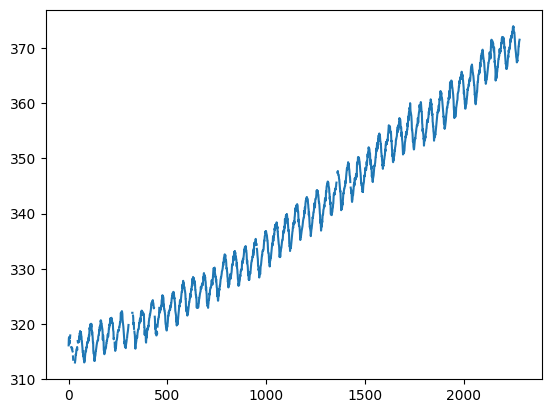

In [4]:
# 데이터 로딩

co2 = sm.datasets.co2.load()
df = pd.DataFrame.from_records(co2.data).iloc[:, [-1]]
df = df.reset_index()
df.columns = ['time', 'co2']
display(df.head())

plt.plot(df.time, df.co2)
plt.show()

In [ ]:
# 데이터 확인 및 추세 추정 (선형)